In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np



data = np.loadtxt('train_2d_reg_data.csv', delimiter=',', skiprows=1, unpack=False)
numOfColumns = data.shape[1]

X = data[:,range(data.shape[1]-1)] # Kolonne 1 og 2 kommer ut for 2D
Y = data[...,(numOfColumns-1)]

xarray = data[...,0] # Need to get this on a matrix-form!



In [8]:
# Updated way of getting the X-matrix!
ones = np.ones(X.shape[0])
X = np.c_[ones,X] # Merge two matrices
print(X)



[[1.    0.418 0.438]
 [1.    0.722 0.606]
 [1.    0.    0.102]
 [1.    0.303 0.323]
 [1.    0.147 0.13 ]
 [1.    0.092 0.468]
 [1.    0.187 0.263]
 [1.    0.346 0.465]
 [1.    0.398 0.321]
 [1.    0.54  0.613]
 [1.    0.42  0.236]
 [1.    0.687 0.712]
 [1.    0.205 0.324]
 [1.    0.88  0.961]
 [1.    0.027 0.075]
 [1.    0.672 0.606]
 [1.    0.418 0.494]
 [1.    0.56  0.675]
 [1.    0.141 0.242]
 [1.    0.199 0.335]
 [1.    0.803 0.425]
 [1.    0.971 0.673]
 [1.    0.314 0.443]
 [1.    0.694 0.738]
 [1.    0.879 0.684]
 [1.    0.897 0.964]
 [1.    0.085 0.463]
 [1.    0.039 0.226]
 [1.    0.17  0.03 ]
 [1.    0.88  0.512]
 [1.    0.099 0.177]
 [1.    0.422 0.582]
 [1.    0.96  0.799]
 [1.    0.535 0.276]
 [1.    0.694 0.583]
 [1.    0.316 0.579]
 [1.    0.688 0.563]
 [1.    0.837 0.606]
 [1.    0.018 0.458]
 [1.    0.752 0.65 ]
 [1.    0.992 0.726]
 [1.    0.75  0.683]
 [1.    0.281 0.374]
 [1.    0.791 0.616]
 [1.    0.103 0.409]
 [1.    0.449 0.598]
 [1.    0.911 0.832]
 [1.    0.294

In [ ]:
# Don't use!
# Place 1 in position 0 in each x-array in the matrix X:
X = np.ones((len(xarray), (data.shape[1])))
place = 0

#1D
if data.shape[1] == 2:
    for obs in xarray:
        # Put one obs in each place in X
        X[place,1] = obs
        place+=1
#2D
if data.shape[1] == 3:
    place = 0
    for obs in data:
        # Put one obs in each place in X
        X[place,1]= obs[1]
        X[place,2] = obs[2]
        place+=1  
print(X)

In [9]:
# Calculating the weights:
Xtrans = np.transpose(X)

XtransDotX = np.dot(Xtrans, X)
# inverse of this result:
matrix1 = np.matrix(XtransDotX)
# Inverse it
matrix1 = matrix1.I

# Xtrans dotted with Y:
XtransDotY = np.dot(Xtrans, Y)

# Finally, to get w:
w = np.dot(matrix1, XtransDotY)
print(w, "weights")


[[0.24079271 0.48155686 0.0586439 ]] weights


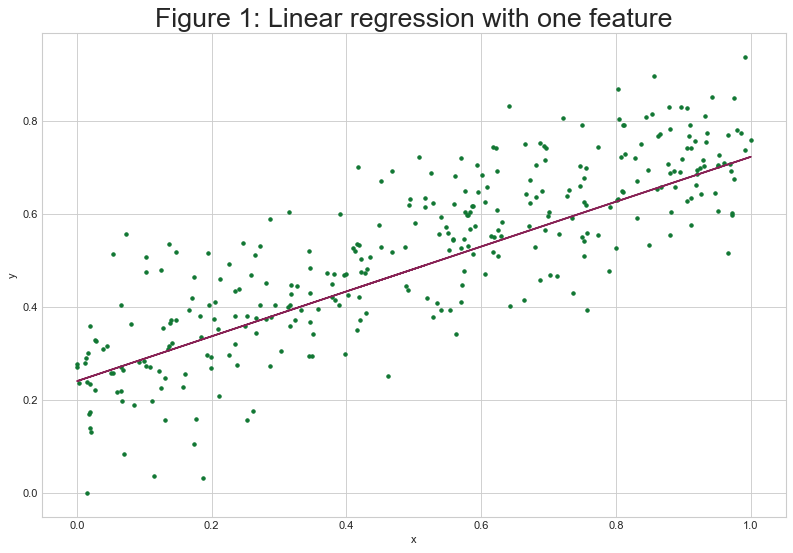

In [12]:
# plotting the given data:

plt.style.use('seaborn-whitegrid')

# Plotting function for model:
def f(x):
 return (w[0,0] + w[0,1]*x)
modelPoints = f(xarray) # was xarray

fig=plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')

font = {
        'weight' : 'bold',
        'size'   : 8}

plt.xlabel('x')
plt.ylabel('y')

plt.title('Figure 1: Linear regression with one feature', size = 24)
plt.scatter(xarray, Y, marker='.',color='#117733')
plt.plot(xarray, modelPoints, color = "#882255")

plt.show()

# Mean squared error for training data
The final hypothesis seems to be fitting the scatter plot well.

In [13]:
# Calc error for training-data 2D:
print(len(Y))

def calculateError(weights, X, Y):

    # Need to transpose the weights so that X can be multiplied with X.
    # X needs is a 325x3 matrix, whilst weights is a 3x1 matrix after it is transposed!
    weights = weights.T
    Xw = X.dot(weights)

    # Continue with the linear algebra to calculate the error:
    error = (1/len(Y)) * (np.linalg.norm(np.subtract(Xw,Y)))**2
    return error
errorForTrainingData = calculateError(w,X,Y)
if data.shape[1] == 2:
    print("errorForTrainingData1D", errorForTrainingData)
else:
    print(("errorForTrainingData2D", errorForTrainingData))


325
('errorForTrainingData2D', 18.712849610736455)


In [14]:
def model(w,x):
    return x.dot(w.T)

def mse(w,x,y):
    error = np.mean(np.square(model(w,x)-y))
    return error
error = mse(w,X,Y)
print(error)

    

0.05757799880226599


# Loading the test-data with the model


In [ ]:
dataTest = np.loadtxt('test_1d_reg_data.csv', delimiter=',', skiprows=1, unpack=False)
xarrayTest = dataTest[...,0] # Need to get this on a matrix-form!
numOfColumns = dataTest.shape[1]
Ytest = dataTest[...,(numOfColumns-1)]


In [ ]:
# Changing xarray that it is on the corrext form:
# Need X on the form 1,x1. We only have one feature for this task.

Xtest = np.ones((len(xarray), (dataTest.shape[1])))
place = 0

#1D
if dataTest.shape[1] == 2:
    for obs in xarrayTest:
        # Put one obs in each place in X
        Xtest[place,1] = obs
        place+=1
#2D
if data.shape[1] == 3:
    place = 0
    for obs in dataTest:
        # Put one obs in each place in X
        Xtest[place,1]= obs[1]
        Xtest[place,2] = obs[2]
        place+=1  


## Mean squared error for test-data

In [ ]:
# The error for the test-data:
testError = mse(w,Xtest,Ytest)
print(testError)

In [ ]:
# Plotting the test-data and the model:

plt.style.use('seaborn-whitegrid')

# Plotting function for model:
def f(x):
 return (w[0,0] + w[0,1]*x)
modelPoints = f(xarrayTest)

fig=plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')

font = {
        'weight' : 'bold',
        'size'   : 8}

plt.xlabel('x')
plt.ylabel('y')

plt.title('Figure 2: Model with test-data', size = 24)
plt.scatter(xarrayTest, Ytest, marker='.',color='#117733')
plt.plot(xarrayTest, modelPoints, color = "#882255")

plt.show()

In [ ]:
print("Weights for training data: ", w)
print("Error for training data: ", error)
print("Error for test data: ", testError)


